In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [25]:
from src.data_loader import ViTDataLoader
from src.vit_train import load_model_dir, ViTTrainer
from src.vit_data import load_cd_data_24x128_p1

model_dir = 'output/cd_fix_24x128_2chan_p1_logfold_20220816_b1f0'

vit, config = load_model_dir(model_dir, legacy=False)
vit_data = load_cd_data_24x128_p1(config.REPLICATE_MODE, config.CHANNEL_1, config.PREDICT_TPM)
config_name = "lfc"

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG, 
                           valid_type=config.VALIDATION_TYPE, valid_arg=config.VALIDATION_ARG)
print(dataloader.split_repr())

trainer = ViTTrainer(vit, config_name, dataloader, resume=True, resume_path=model_dir)


Split: time,120; Training: 17708; Validation: 0; Testing: 4427


In [26]:
trainer.setup()

Resuming from 320...


In [332]:
trainer.compute_predictions_losses()

Computing test predictions...Done. 0.656, 0.658
00:01:03.29
Computing train predictions...Done. 0.460, 0.548
00:05:11.67
Computing validation predictions...Done. nan, nan
00:05:11.68


In [ ]:
print(trainer.perf_str)

In [ ]:
trainer.plot_predictions()

In [ ]:
from src.rna_plotter import load_rna_plotter
from src.orf_plotter import ORFAnnotationPlotter

orf_plotter = ORFAnnotationPlotter()
rna_plotter = load_rna_plotter()
trainer.orf_plotter = orf_plotter
trainer.rna_plotter = rna_plotter


In [ ]:
from src.vit_viz import plot_gene_prediction

trainer.plot_gene('HSP26', 7.5)
0

In [ ]:
trainer.plot_gene('HSP26', 120)
0

In [27]:
from src.attention_analysis import AttentionAnalysis

a_analysis = AttentionAnalysis(trainer=trainer)

In [30]:
a_analysis.compute_attentions(t=None)

1/22135 - 00:00:00.26
1001/22135 - 00:03:59.02
2001/22135 - 00:08:33.79
3001/22135 - 00:15:24.23
4001/22135 - 00:20:03.58
5001/22135 - 00:23:49.56
6001/22135 - 00:28:21.19
7001/22135 - 00:32:40.33
8001/22135 - 00:36:51.11
9001/22135 - 00:41:05.58
10001/22135 - 00:45:15.48
11001/22135 - 00:49:26.39
12001/22135 - 00:53:40.68
13001/22135 - 00:57:52.30
14001/22135 - 01:02:11.06
15001/22135 - 01:06:28.38
16001/22135 - 01:27:15.39
17001/22135 - 01:30:58.49
18001/22135 - 01:34:39.03
19001/22135 - 01:38:23.33
20001/22135 - 01:42:08.77
21001/22135 - 01:45:55.63
22001/22135 - 01:49:48.99


In [31]:
from src.utils import write_pickle
write_pickle(a_analysis.trainer.collected_attentions,
            f"{a_analysis.trainer.out_dir}/collected_attentions_all.pkl")

Wrote output/cd_fix_24x128_2chan_p1_logfold_20220816_b1f0/collected_attentions_all.pkl


In [129]:
a_analysis.compute_umap(t=120)

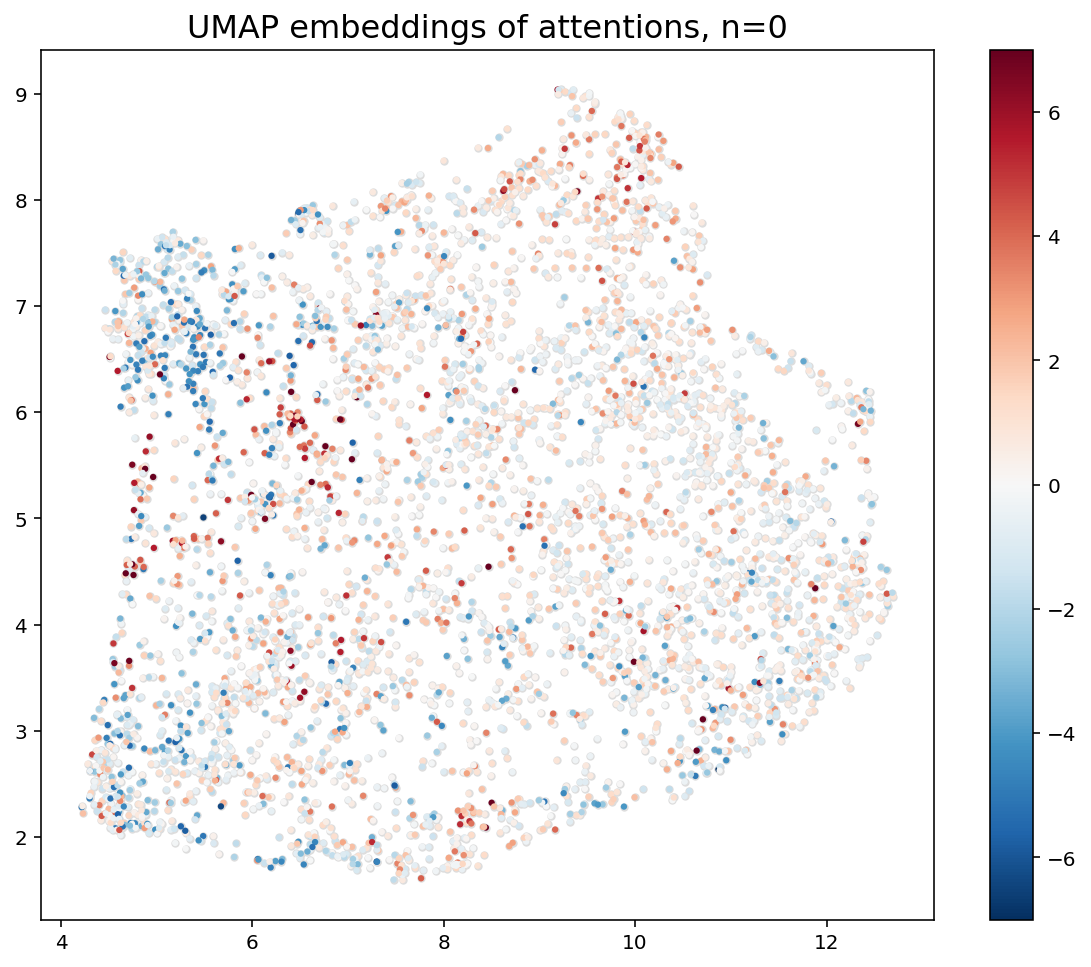

In [130]:
a_analysis.plot_umap(t=120, selected_orfs=[], ascending=None)

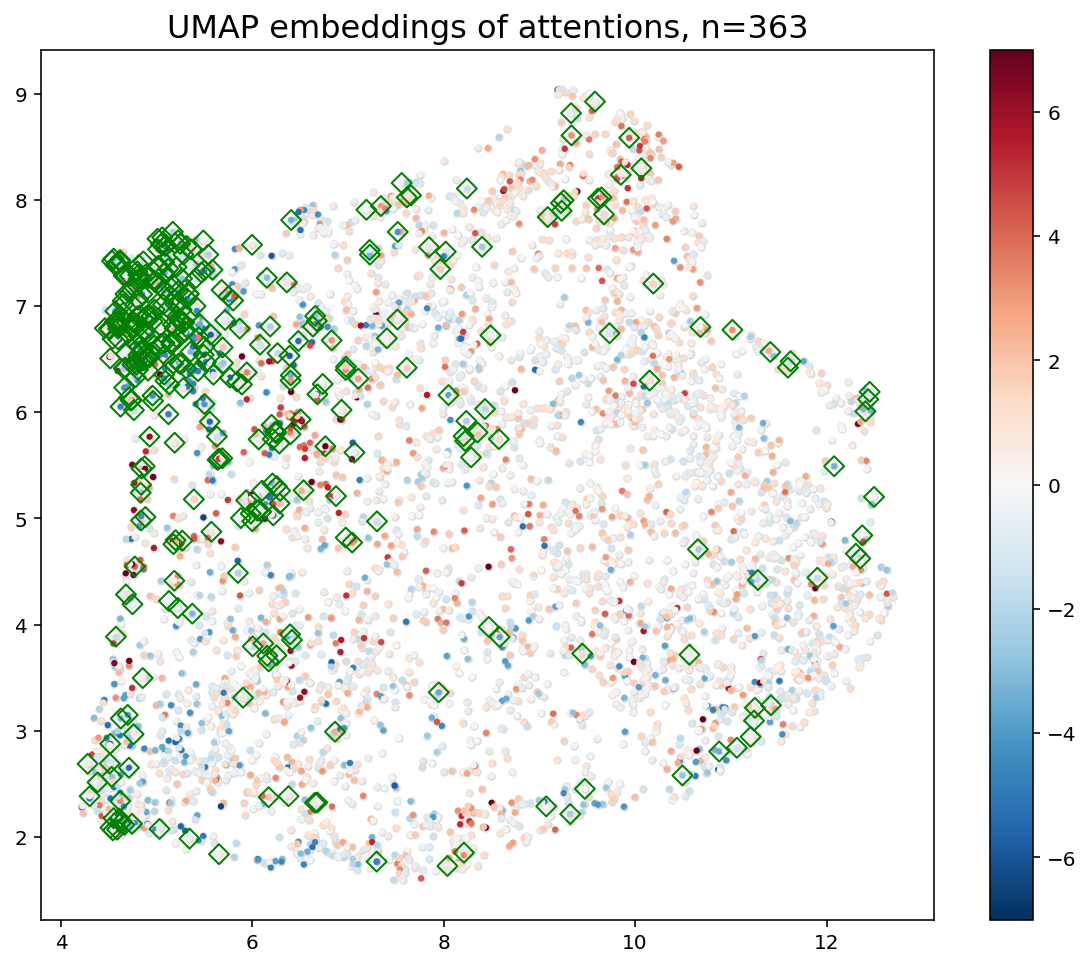

In [132]:
from src.attention_analysis import orfs_for_rossi_tf

a_analysis.load_rossi()
rossi_w_targets = a_analysis.rossi_w_targets

selected_orfs = orfs_for_rossi_tf(vit_data.orfs_data, rossi_w_targets, 'Yta7')

a_analysis.plot_umap(t=120, selected_orfs=selected_orfs)
